In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob
from astropy.io import fits
from sklearn.cluster import HDBSCAN

In [2]:


#Glob away all the fits in a dir
fits_list =glob.glob("*.fits")
print(fits_list)

['spec-1678-53433-0001.fits', 'spec-1678-53433-0425.fits', 'spec-0548-51986-0020.fits', 'spec-0548-51986-0001.fits']


In [3]:
#Extra the fits tables from all the globbed fits
specdata_list=[]
for i in fits_list:
    with fits.open(i) as fit_file:
        specdata=fit_file[1].data
        header=fit_file[0].header
        specdata_list.append(specdata)


In [4]:
#Get the shapes of each spectra then find the smallest shape along 0 axis
spec_shape_list=[]
for i in specdata_list:
    print(i.shape)
    spec_shape_list.append(i.shape)

spec_shape_list=np.array(spec_shape_list)
smallest_spec=np.min(spec_shape_list)

(3822,)
(3846,)
(3828,)
(3769,)


In [5]:
#Performing filtering of the spectra along lambda axis as data is not recording properly from first lambda
#to last lambda, as in some spectra the measurements start from different first to different last lambda
spectra_filtered_list=[]
for i in specdata_list:
    spec=i
    #apply booleam mask along lambda axis from 3.562 to 3.957 lambdas
    mask = (spec.loglam >= 3.582) & (spec.loglam <= 3.957)
    filtered_data = spec[mask]
    spectra_filtered_list.append(filtered_data)
#And here we have a np array containing individual spectras
spectra_filtered_list=np.array(spectra_filtered_list)
spectra_filtered_list.shape

(4, 3751)

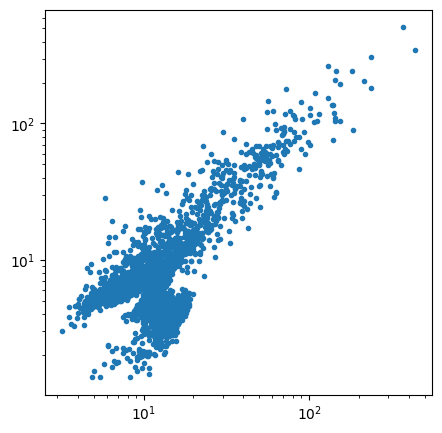

In [6]:
plt.figure(figsize=(5,5))
plt.scatter( spectra_filtered_list[1]['sky'], spectra_filtered_list[3]['sky'], marker='.')
plt.yscale('log')
plt.xscale('log')


In [12]:
cluster_array=np.array([spectra_filtered_list[1]['sky'], spectra_filtered_list[3]['sky']]).T   

cluster= HDBSCAN(min_cluster_size=20, min_samples=20)
cluster.fit( cluster_array  )

HDBSCAN(min_cluster_size=20, min_samples=20)

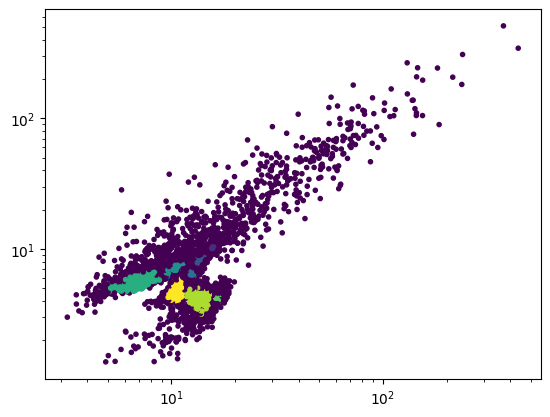

In [13]:
plt.scatter(cluster_array[:,0],cluster_array[:,1], marker='.', c= cluster.labels_)
plt.yscale('log')
plt.xscale('log')

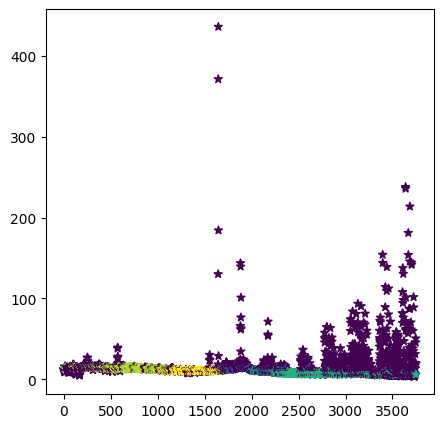

In [14]:


labels=cluster.labels_




plt.figure(figsize=(5,5))
fibre1= cluster_array[:,0]
wave=np.arange(len(fibre1))
plt.scatter(wave, fibre1, c=cluster.labels_, marker='*')



In [32]:
discard_label= labels==-1
cluster_array[discard_label,:]=1




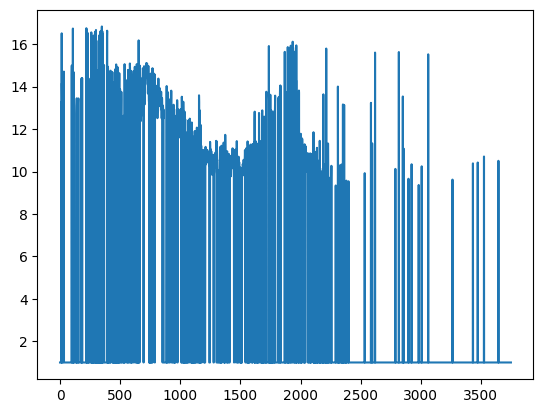

In [33]:
plt.plot(cluster_array[:,0])

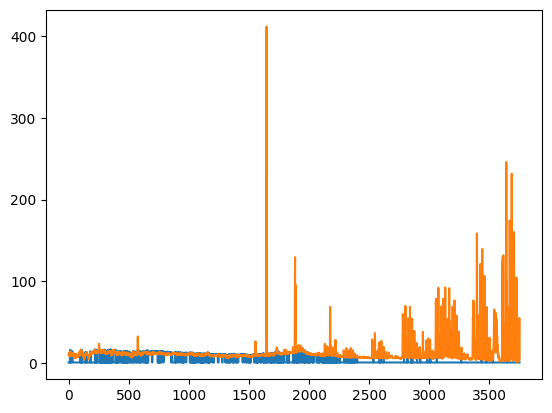

In [34]:
plt.plot(cluster_array[:,0])
plt.plot(spectra_filtered_list[0]['sky'])